In [0]:
# import basic libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

digits = load_digits()

In [2]:
print("image data shape", digits.data.shape)
print("label data shape", digits.target.shape)

image data shape (1797, 64)
label data shape (1797,)


Figure(1440x288)
AxesSubplot(0.125,0.125;0.133621x0.755)
AxesImage(180,36;192.414x217.44)
Text(0.5, 1.0, 'Training: 0\n')
AxesSubplot(0.285345,0.125;0.133621x0.755)
AxesImage(410.897,36;192.414x217.44)
Text(0.5, 1.0, 'Training: 1\n')
AxesSubplot(0.44569,0.125;0.133621x0.755)
AxesImage(641.793,36;192.414x217.44)
Text(0.5, 1.0, 'Training: 2\n')
AxesSubplot(0.606034,0.125;0.133621x0.755)
AxesImage(872.69,36;192.414x217.44)
Text(0.5, 1.0, 'Training: 3\n')
AxesSubplot(0.766379,0.125;0.133621x0.755)
AxesImage(1103.59,36;192.414x217.44)
Text(0.5, 1.0, 'Training: 4\n')


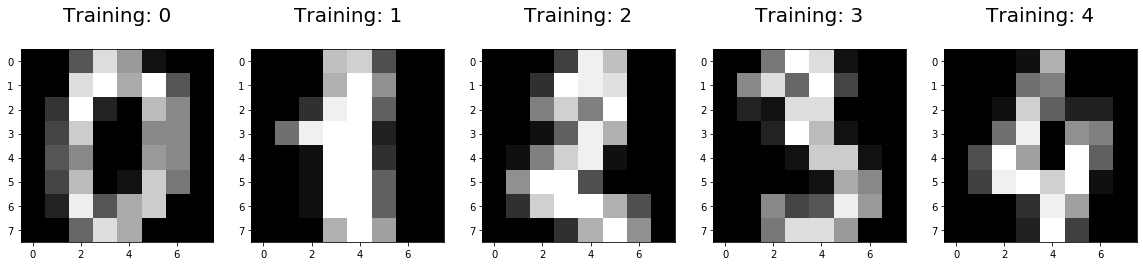

In [3]:
print(plt.figure(figsize=(20,4)))
for index, (image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    print(plt.subplot(1,5,index+1))
    print(plt.imshow(np.reshape(image, (8,8)),cmap=plt.cm.gray))
    print(plt.title('Training: %i\n' %label, fontsize=20))

In [0]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [5]:
print(x_train.shape)

(1383, 64)


In [6]:
print(y_train.shape)

(1383,)


In [7]:
print(x_test.shape)

(414, 64)


In [8]:
print(y_test.shape)

(414,)


In [9]:
# removes warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver='liblinear')
logisticRegr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# resturns a numpy array
# predict for one observation(image)
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


In [11]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [12]:
predictions = logisticRegr.predict(x_test)

score = logisticRegr.score(x_test, y_test)
print(score)

0.9420289855072463


In [13]:
cm = metrics.confusion_matrix(y_test,predictions)
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  1  0  0  0  0  2  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  3  2  0]
 [ 0  2  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  2  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  1  3 28]]


Figure(648x648)
AxesSubplot(0.125,0.1925;0.62x0.62)
Text(60.0, 0.5, 'Actual label')
Text(0.5, 103.73999999999997, 'predicted label')
Text(0.5, 1, 'Accuracy score: 0.9420289855072463')


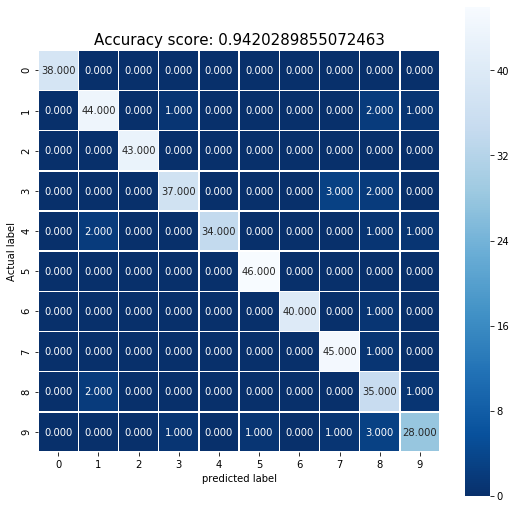

In [14]:
print(plt.figure(figsize=(9,9)))
print(sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r'));
print(plt.ylabel('Actual label'));
print(plt.xlabel('predicted label'));
all_sample_title='Accuracy score: {0}' .format(score)
print(plt.title(all_sample_title, size=15));

Figure(1440x216)
AxesSubplot(0.125,0.125;0.168478x0.755)
AxesImage(180,27;242.609x163.08)
None
Text(0.5, 1.0, 'Predicted: 4, Actual: 4')
AxesSubplot(0.327174,0.125;0.168478x0.755)
AxesImage(471.13,27;242.609x163.08)
None
Text(0.5, 1.0, 'Predicted: 0, Actual: 0')
AxesSubplot(0.529348,0.125;0.168478x0.755)
AxesImage(762.261,27;242.609x163.08)
None
Text(0.5, 1.0, 'Predicted: 9, Actual: 9')
AxesSubplot(0.731522,0.125;0.168478x0.755)
AxesImage(1053.39,27;242.609x163.08)
None
Text(0.5, 1.0, 'Predicted: 1, Actual: 1')


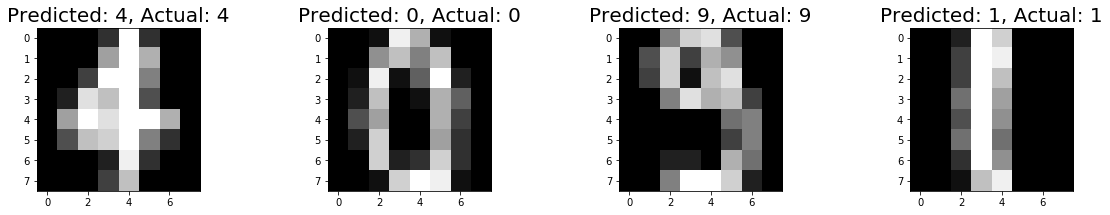

In [15]:
index=0
misclassifiedIndex=[]
for predict, actual in zip(predictions, y_test):
    if predict==actual:
        misclassifiedIndex.append(index)
    index +=1
print(plt.figure(figsize=(20,3)))
for plotIndex, wrong in enumerate(misclassifiedIndex[0:4]):
    print(plt.subplot(1,4,plotIndex +1))
    print(print(plt.imshow(np.reshape(x_test[wrong], (8,8)),cmap=plt.cm.gray)))
    print(plt.title("Predicted: {}, Actual: {}" .format(predictions[wrong], y_test[wrong]), fontsize=20))